# Régression Logistique avec SGDClassifier de sklearn Dataset mails
Objectif c'est de classifier les emails (<b>spam</b> ou <b>non spam</b>)

In [8]:
import pandas as pd #Importer les Dataset
import numpy as np #Manipuler le Dataset comme matrice
import matplotlib.pyplot as plt #Visualiser Les données
from sklearn.linear_model import SGDClassifier #Contient l'algorithme de Gradient Descent et d'autres

In [9]:
df = pd.read_csv('mails.csv',delimiter=",")
df.head()

,fautes d'orthographe,nbr des mots-clés déclencheurs,Spam
0,1,0,0
1,2,3,0
2,3,2,0
3,4,1,0
4,5,5,1


In [10]:
X1 = df.iloc[:,0].values #colonne des fautes d'orthographe 
X2 = df.iloc[:,1].values #colonne des nbr des mots-clés déclencheurs
Y = df.iloc[:,-1].values #colonne spam ou non spam

X1 = X1.reshape(len(X1),1) #redimenssionner X1 vers un vecteur colonne
X2 = X2.reshape(len(X2),1)
X = np.hstack((X1, X2)) #Concatenation des features

Y = Y.reshape(len(Y),1)

In [11]:
Y

array([[0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [12]:
X

array([[ 1,  0],
       [ 2,  3],
       [ 3,  2],
       [ 4,  1],
       [ 5,  5],
       [ 6,  7],
       [ 7,  6],
       [ 8,  6],
       [ 9,  7],
       [10,  8]])

### Model

In [13]:
# fit the model
clf = SGDClassifier(alpha=0.01, max_iter=1000)
clf.fit(X,Y)

/home/ayoub/.local/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.01)

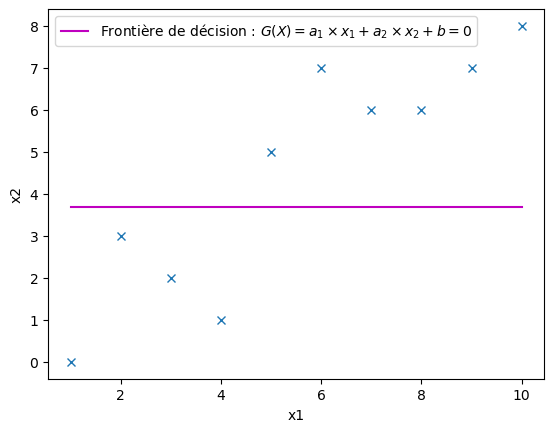

In [14]:
plt.xlabel("x1")
plt.ylabel("x2")
plt.plot(X[:, 0], X[:, 1], 'x')

#a1, a2 et b ou bien theta0, theta1, theta2
theta0, theta1, theta2 = clf.coef_[0,0], clf.coef_[0,1], clf.intercept_[0]

plt.plot(X[:, 0], -theta0*X[:, 0]/theta1 - theta2/theta1, 
         label = 'Frontière de décision : $G(X) = a_1 \\times x_1 + a_2 \\times x_2 + b = 0$', color='m')
plt.legend()

### coefficient de détermination

In [15]:
clf.score(X, Y)

1.0

### Prédiction
### Exp1 :
email1 : fautes d'orthographe = 6 	nbr des mots-clés déclencheurs = 6

### Prédiction :
<b>Spam</b>

### Exp2 :
email2 : fautes d'orthographe = 1 	nbr des mots-clés déclencheurs = 1

### Prédiction :
<b>Non spam</b>

In [16]:
print(clf.predict([[6, 6]]))

[1]


In [17]:
print(clf.predict([[1, 1]]))

[0]
